### Feature Selection
- 모델을 구성하는 주요 피처들을 선택
  - 불 필요한 다수의 피처들로 인해 모델 성능을 떨어뜨릴 가능성 제거
  - 설명 가능한 모델이 될 수 있도록 피처들을 선별

### Feature Selection 유형
- 피처값의 분포, Null, 피처간 높은 상관도, 결정과의 독립성등을 고려
- 모델의 피처 중요도(Feature importance) 기반

### RFE(Recursice Feature Elimination)
- 모델 최초 학습 후 Feature 중요도 선정
- feature 중요도가 낮은 속성들을 차례로 제거해 가면서 반복적으로 학습/평가를 수행하여 feature 추출
- 수행시간이 오래 걸리고, 낮은 속성들을 제거해 나가는 메커니즘이 정확한 Feature Selection을 찾는 목표에 정확히 부합하지 않을 수 있음

### SelectFromModel
- 모델 최초 학습 후 선정된 Feature 중요도에 따라 평균/중앙값의 특정 비율 이상인 Feature들을 선택



Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.


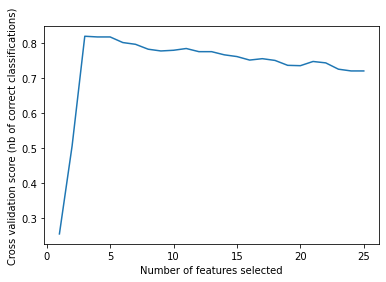

In [2]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV, RFE
from sklearn.datasets import make_classification

# 분류를 위한 Feature의 개수가 25개인 데이터 1000개 생성
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                          n_redundant=2, n_repeated=0, n_classes=8,
                          n_clusters_per_class=1, random_state=0)

# SVC classifier 선택
svc = SVC(kernel="linear")
# RFECV로 Feature들을 반복적으로 제거해가면서 학습/평가 수행
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
             scoring="accuracy", verbose=2)
rfecv.fit(X, y)

# Plot number of features VS, cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [3]:
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=10000, n_features=25, n_informative=3,
                          n_redundant=2, n_repeated=0, n_classes=8,
                          n_clusters_per_class=1, random_state=0)

In [ ]:
# SVC classifier 선택
svc = SVC(kernel="linear")
# RFECV로 Feature들을 반복적으로 제거해가면서 학습/평가 수행
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
             scoring="accuracy", verbose=2)
rfecv.fit(X, y)

# Plot number of features VS, cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### SelectFromModel

In [5]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

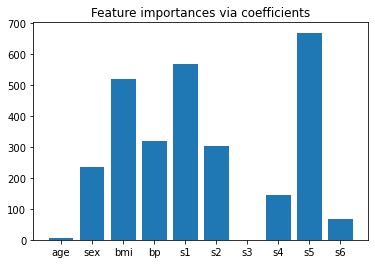

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV

lasso = LassoCV().fit(X, y)
importance = np.abs(lasso.coef_) # 회귀계수
feature_names = np.array(diabetes.feature_names)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

In [9]:
from sklearn.feature_selection import SelectFromModel
from time import time

threshold = np.sort(importance)[-3] + 0.01 # 가장 높은 값 3개를 가져와서 + 0.01
print('threshold:', threshold)

sfm = SelectFromModel(lasso, threshold=threshold).fit(X, y)
print("Feature selected by SelectFromModel: "
     f"{feature_names[sfm.get_support()]}")

threshold: 521.7485426067491
Feature selected by SelectFromModel: ['s1' 's5']
